In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
    
df = pd.read_csv(url,delimiter=',')



In [10]:
df = df.iloc[:, 1:]
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [2]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
    
df_weather = pd.read_csv(url,delimiter=',')

In [11]:
df2_weather = df_weather.iloc[:, 1:]

df2_weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,JFK,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0
8715,JFK,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0
8716,JFK,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0
8717,JFK,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0


№1 Изучим в каком аэропорту и во сколько в среднем самые большие задержки вылета

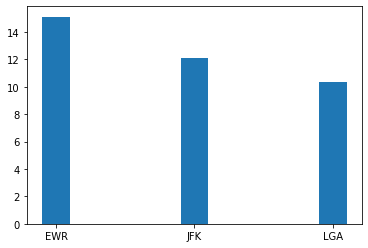

In [13]:
df2 = df.copy(deep = True)

res = df2.groupby('origin')['dep_delay'].mean().sort_values()[:: -1]
x = res.index

plt.bar(x, res, width = 0.2)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

hour
0.0     346.574194
1.0     269.000000
2.0     304.000000
4.0      -5.554098
5.0      -3.599726
6.0      -0.978242
7.0       1.731109
8.0       2.721203
9.0       7.807543
10.0      5.666125
11.0      7.689545
12.0      7.668086
13.0      9.924518
14.0     13.349431
15.0     15.199606
16.0     17.096989
17.0     18.784433
18.0     24.941886
19.0     29.746245
20.0     29.145631
21.0     38.883585
22.0     93.150654
23.0    148.254072
Name: dep_delay, dtype: float64


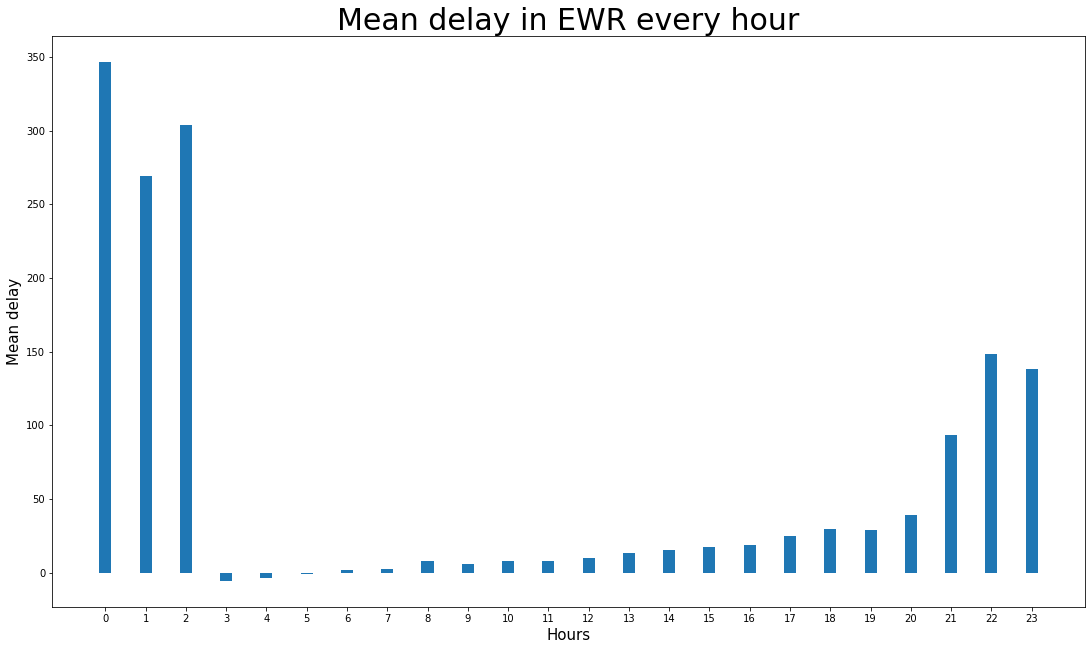

In [14]:
df3 = df.copy(deep = True)

fig, ax = plt.subplots()

tbl = df3[df3['origin'] == 'EWR']
res = tbl.groupby('hour')['dep_delay'].mean().sort_index()

res[0] = res[0] + res[24]
x = np.arange(24)

plt.bar(x, res, width = 0.3)

del res[24]
print(res)

plt.xticks(x)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Mean delay in EWR every hour', size = 30)
plt.xlabel('Hours', size = 15)
plt.ylabel('Mean delay', size = 15)
plt.show()



Вывод: В среднем самые большие задержки при вылете в аэропорту EWR в ночное время (с 21 до 2 часов)

№2 Рассмотрим, как связаны задержка вылета и влажность воздуха в конкретный момент времени.

In [15]:
res_weather = df2_weather[df2_weather['origin'] == 'EWR']

df4 = df.copy(deep = True)
df4[df4['origin'] == 'EWR']

res = df4.groupby(['year', 'month', 'day', 'hour'])[['dep_delay', 'arr_delay']].mean().sort_index()



In [16]:
tab = pd.merge(res_weather, res, on = ['year', 'month', 'day', 'hour'])
tbl = tab[tab['month'] < 10]

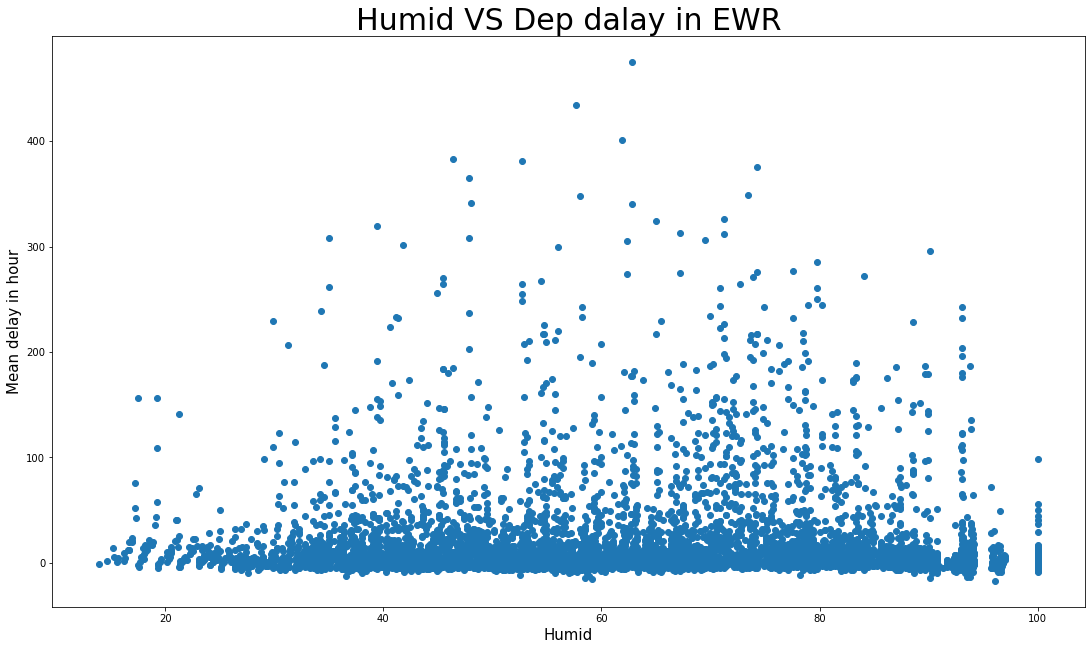

In [17]:
tbl2 = tbl.copy(deep = True)
humid_delay = tbl2.loc[:, ['humid', 'dep_delay']]

fig, ax = plt.subplots()

plt.scatter(humid_delay.iloc[:, 0].sort_values(), humid_delay.iloc[:, 1] )

fig.set_size_inches(18.5, 10.5, forward=True)

plt.title('Humid VS Dep dalay in EWR', size = 30)
plt.xlabel('Humid', size = 15)
plt.ylabel('Mean delay in hour', size = 15)
plt.show()

Вывод: небольшие задержки случаются и независимо от влажности воздуха. Но можно заметить, что плотность количества задержек рейса от 50 до 200 минут, увеличивается с ростом влажности воздуха.

Активный рост этого показателя идёт до ~70% влажности, при больших показателях, время задержек рейсов в основном <50 минут.

(Возможно при таких показателях влажности большинство рейсов отменяют заранее)
    

№3 Рассмотрим с чем связаны задержки при вложности воздуха >70%.

Я рассмотрел зависимость времени задержки вылета от кол-ва осадков и от температуры при влажности воздуха >70%

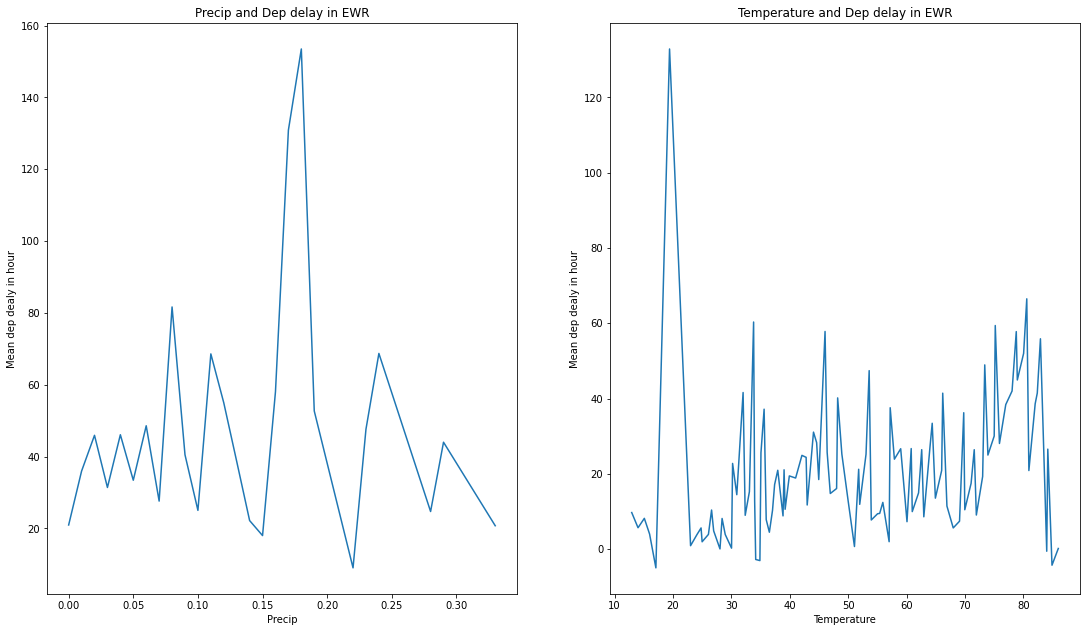

In [23]:
df5 = tbl.copy(deep = True)

tbl3 = df5[df5['humid'] > 70]

tbl3_new = tbl3[tbl3['precip'] < 1]

fig, ax = plt.subplots(1, 2)

t = tbl3_new.groupby('temp')['dep_delay'].mean().sort_index()

ax[1].plot(t)
ax[1].set(title = 'Temperature and Dep delay in EWR', xlabel = 'Temperature', ylabel = 'Mean dep dealy in hour')

p = tbl3_new.groupby('precip')['dep_delay'].mean().sort_index()

ax[0].plot(p)
ax[0].set(title = 'Precip and Dep delay in EWR', xlabel = 'Precip', ylabel = 'Mean dep dealy in hour')

fig.set_size_inches(18.5, 10.5, forward=True)


Вывод: В данном случае время задержки рейса при вылете резко увеличиваются при показателе осадков 0.15-0.2 и так же можно заметить, что оно резко увеличивается при температуре от 15 до 20.
    

In [281]:
tbl

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,dep_delay,arr_delay
0,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,-1.156863,-0.862745
1,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0,1.378378,2.378378
2,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0,14.109375,12.218750
3,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0,6.019231,6.057692
4,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0,0.512821,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,EWR,2013,9.0,30.0,19.0,71.96,51.08,47.75,150.0,8.05546,9.270062,0.0,1015.4,10.0,8.620690,-7.068966
5716,EWR,2013,9.0,30.0,20.0,71.96,51.98,49.36,140.0,6.90468,7.945768,0.0,1015.2,10.0,4.946429,-13.625000
5717,EWR,2013,9.0,30.0,21.0,69.98,53.06,54.94,170.0,5.75390,6.621473,0.0,1015.0,10.0,17.160000,1.640000
5718,EWR,2013,9.0,30.0,22.0,68.00,53.06,58.80,150.0,5.75390,6.621473,0.0,1015.4,10.0,28.900000,16.200000


№4 Рассмотрим, при каждом из 4-ех направлениях ветра суммарное время задержек рейса при вылете.

West, South, East, North:  15 % , 28 % , 30 % , 22 %


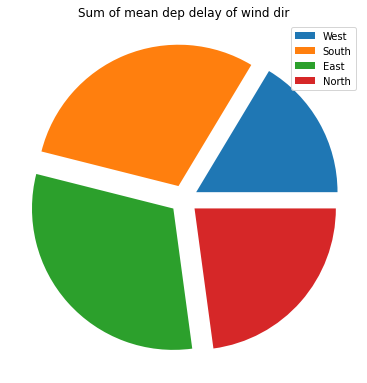

In [276]:
df6 = tbl.copy(deep = True)
fig, ax = plt.subplots()

w = df6[df6['wind_dir'] < 135]
west = w[w['wind_dir'] > 45 ]


s = df6[df6['wind_dir'] < 225]
south = s[s['wind_dir'] > 135 ]

e = df6[df6['wind_dir'] < 315]
east = e[e['wind_dir'] > 225 ]


n1 = df6[df6['wind_dir'] > 315]
n2 = df6[df6['wind_dir'] < 45]

north = pd.concat([n1, n2])

wproc = int(100 * (west['dep_delay'].sum() / df6['dep_delay'].sum()))
sproc = int(100 * (south['dep_delay'].sum() / df6['dep_delay'].sum()))
eproc = int(100 * (east['dep_delay'].sum() / df6['dep_delay'].sum()))
nproc = int(100 * (north['dep_delay'].sum() / df6['dep_delay'].sum()))

print('West, South, East, North: ', wproc,'% ,', sproc,'% ,', eproc,'% ,', nproc,'%')
plt.pie([west['dep_delay'].sum(), south['dep_delay'].sum(), east['dep_delay'].sum(), north['dep_delay'].sum()], labels = ['West', 'South', 'East', 'North'], 
       explode = (0.1, 0.1, 0.1, 0.1), labeldistance= None)

plt.title('Sum of mean dep delay of wind dir')
fig.set_size_inches(14.5, 6.5, forward=True)
plt.legend()
plt.show()

Вывод: При западном и южном ветрах суммарное время задержек рейса составляет наибольшую часть от суммы задержек рейса при вылете за всё время (30% - западный, 28% - южный)  

№5 Основываясь на п.4 рассмотрим, как связаны задержки вылета рейса и скорость ветра при западном и южном направлениях.

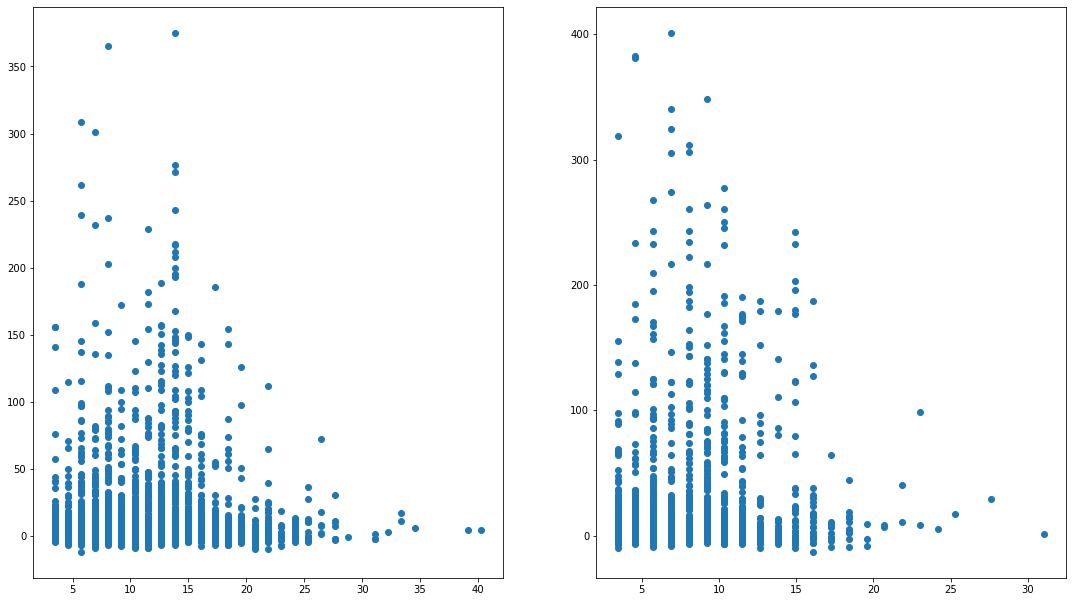

In [287]:
fig, ax = plt.subplots(1, 2)
east_new = east[east['wind_speed'] < 100]
ax[0].scatter(east_new['wind_speed'].sort_values(), east_new['dep_delay'])

ax[1].scatter(south['wind_speed'].sort_values(), south['dep_delay'])

fig.set_size_inches(18.5, 10.5, forward=True)


Вывод: с ростом скорости западного ветра до 15 м/с и южного - до 10 м/с время задержек растёт, при большей скорости ветра, он уже меньше влияет на время.

In [293]:
tbl

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,dep_delay,arr_delay
0,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,-1.156863,-0.862745
1,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0,1.378378,2.378378
2,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0,14.109375,12.218750
3,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0,6.019231,6.057692
4,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0,0.512821,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,EWR,2013,9.0,30.0,19.0,71.96,51.08,47.75,150.0,8.05546,9.270062,0.0,1015.4,10.0,8.620690,-7.068966
5716,EWR,2013,9.0,30.0,20.0,71.96,51.98,49.36,140.0,6.90468,7.945768,0.0,1015.2,10.0,4.946429,-13.625000
5717,EWR,2013,9.0,30.0,21.0,69.98,53.06,54.94,170.0,5.75390,6.621473,0.0,1015.0,10.0,17.160000,1.640000
5718,EWR,2013,9.0,30.0,22.0,68.00,53.06,58.80,150.0,5.75390,6.621473,0.0,1015.4,10.0,28.900000,16.200000


№6 Рассмотрим, как зависит время задержки рейса на взлот и посадку от месяца.

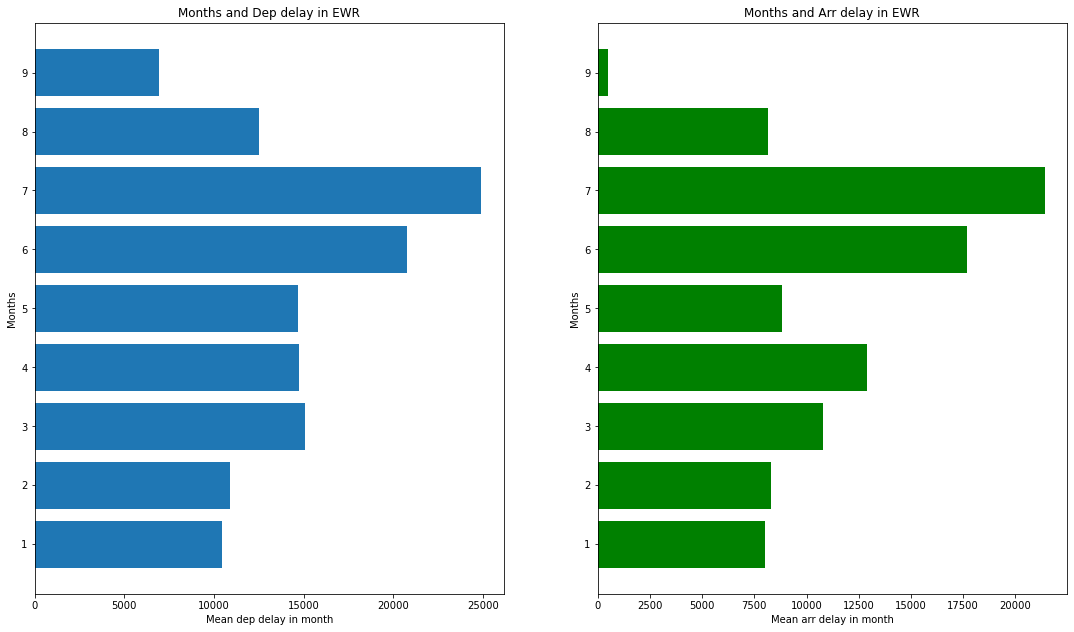

In [336]:
df7 = tbl.copy(deep = True)

months = np.arange(1,10)
dep_time = np.zeros(9, dtype=np.float16)
arr_time = np.zeros(9, dtype=np.float16)


for i in months:
    dep_time[i-1] = df7[df7['month'] == i]['dep_delay'].sum()
    arr_time[i-1] = df7[df7['month'] == i]['arr_delay'].sum()
    
fig, ax = plt.subplots(1, 2)

ax[0].barh(months, dep_time)
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].set(title = 'Months and Dep delay in EWR', xlabel = 'Mean dep delay in month', ylabel = 'Months')



ax[1].barh(months, arr_time, color = 'green')
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].set(title = 'Months and Arr delay in EWR', xlabel = 'Mean arr delay in month', ylabel = 'Months')


fig.set_size_inches(18.5, 10.5, forward=True)


Вывод: суммарное время задержек рейса на взлет и посадку преимущественно в июне и июле больше, чем в другие месяцы.

№7 Рассмотрим, зависимость времени задержки рейса на посадку от видимости.

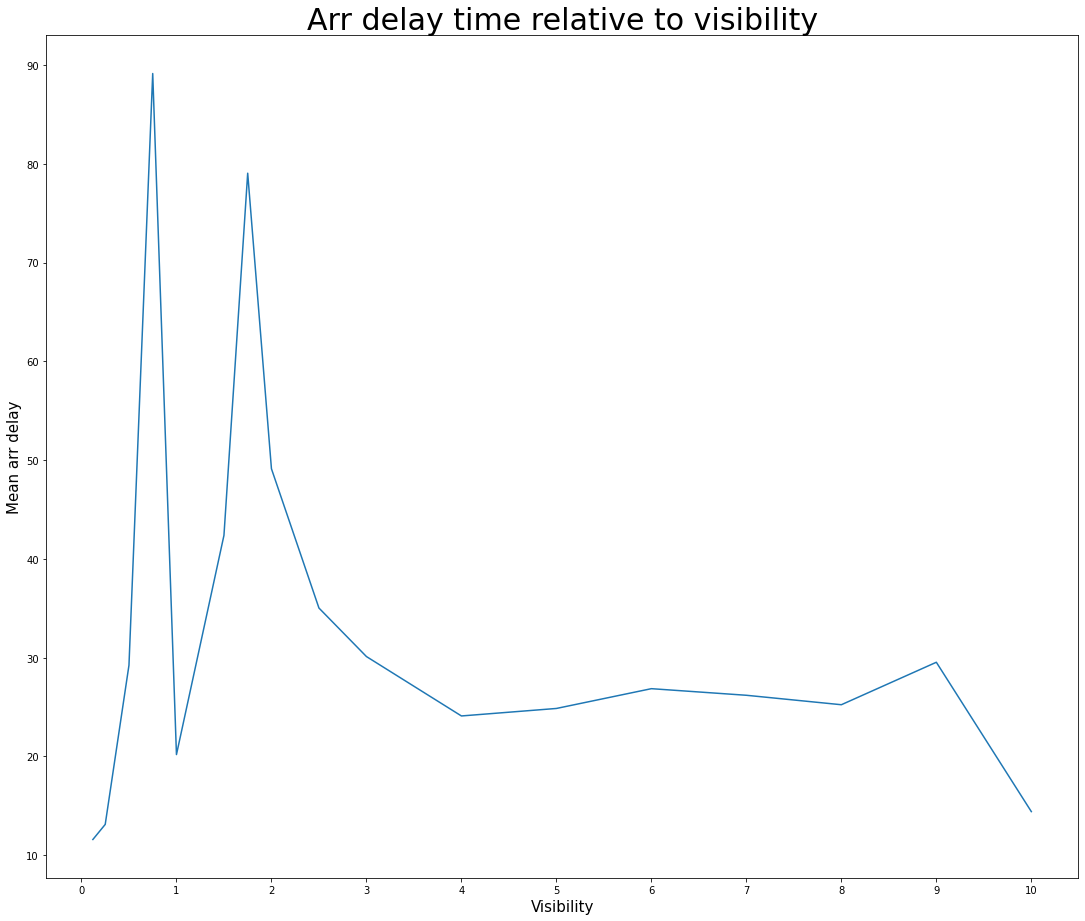

In [366]:
df8 = tbl.copy(deep = True)
fig, ax = plt.subplots()
#plt.scatter(df8['visib'], df8['arr_delay'])

vis_delay = df8.groupby('visib')['arr_delay'].mean().sort_index() 

#print(vis_delay.iloc[:, [1]])

plt.plot(vis_delay)


fig.set_size_inches(18.5, 15.5, forward=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title('Arr delay time relative to visibility', size = 30)
plt.xlabel('Visibility', size = 15)
plt.ylabel('Mean arr delay', size = 15)
plt.show()

Вывод: При низкой видимости время задержки резко увеличивается.

№8 Рассмотрим в каких аэропортах среднее время задержки посадки наибольшее и наименьшее.

dest
LGA          NaN
CAE    41.764151
TUL    33.659864
OKC    30.619048
JAC    28.095238
         ...    
ANC    -2.500000
STT    -3.835907
SNA    -7.868227
PSP   -12.722222
LEX   -22.000000
Name: arr_delay, Length: 105, dtype: float64


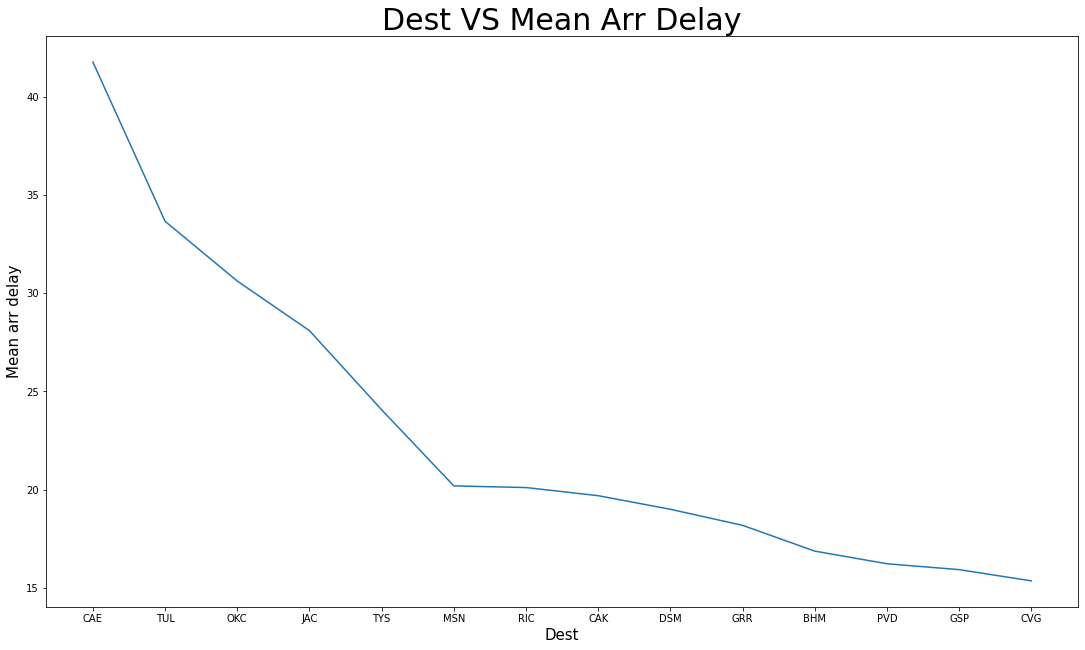

In [77]:
fig, ax = plt.subplots()

df10 = df.copy(deep = True)
res = df10.groupby('dest')['arr_delay'].mean().sort_values()[::-1]

x = np.asarray(res.index[0:15])
print(res)


ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
res[0:15].plot()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Dest VS Mean Arr Delay', size = 30)
plt.xlabel('Dest', size = 15)
plt.ylabel('Mean arr delay', size = 15)
plt.show()

Вывод: в аэропорту CAE среднее время задержки существенно больше, чем в других аэропортах. А в LEX, наоборот, в среднем самолёты чаще прилетают раньше назначенного времени.

№9 Рассмотрим связь времени задержки рейса от авиакомпании.

carrier
F9    20.215543
EV    19.955390
YV    18.996330
FL    18.726075
WN    17.711744
9E    16.725769
B6    13.022522
VX    12.869421
OO    12.586207
UA    12.106073
MQ    10.552041
DL     9.264505
AA     8.586016
AS     5.804775
HA     4.900585
US     3.782418
Name: dep_delay, dtype: float64


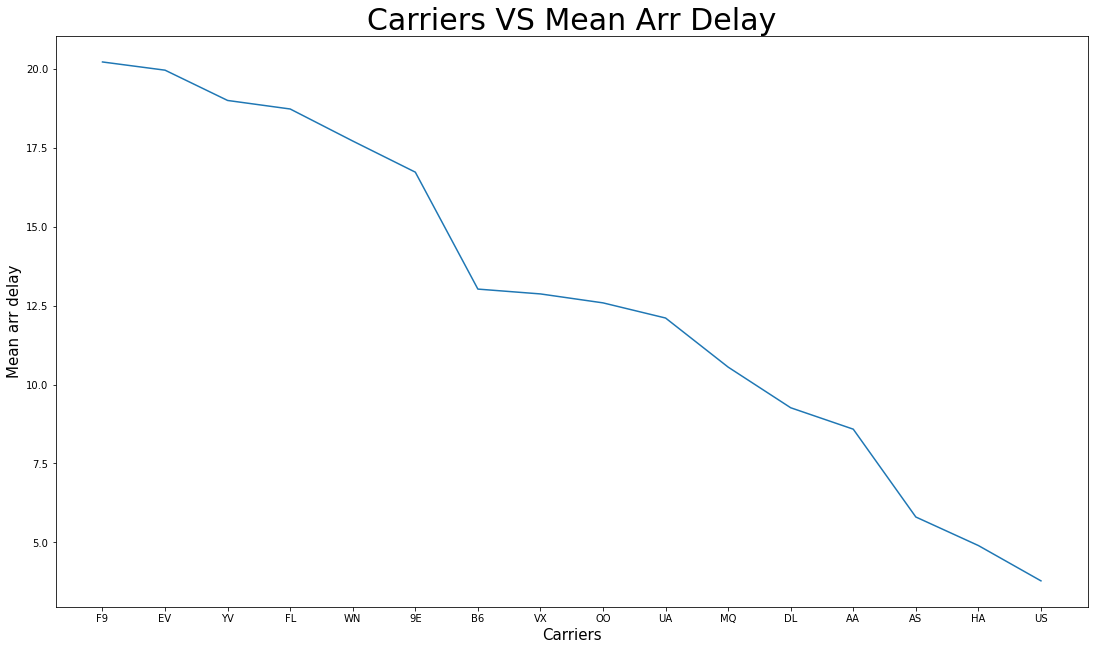

In [76]:
df11 = df.copy(deep = True)

fig, ax = plt.subplots()

res = df11.groupby('carrier')['dep_delay'].mean().sort_values()[::-1]

x = np.asarray(res.index[0:15])
print(res)


ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
res[0:20].plot()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Carriers VS Mean Arr Delay', size = 30)
plt.xlabel('Carriers', size = 15)
plt.ylabel('Mean arr delay', size = 15)
plt.show()


Вывод: Лучше работать с компаниями [US, HA, AS], у них среднее время задержки наименьшее.

№10 Рассмотрим какая доля полётов задерживается.

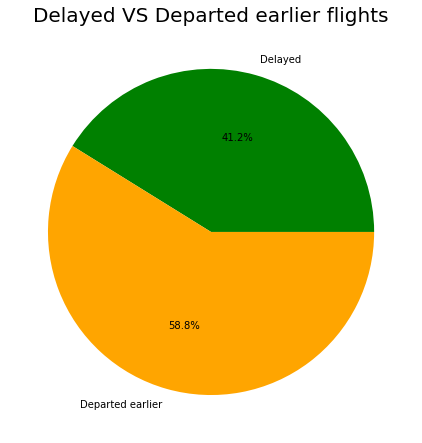

In [79]:
df12 = df.copy(deep = True)
fig, ax = plt.subplots()
delay_plus = (df12['dep_delay'] > 0).sum()

delay_minus = (df12['dep_delay'] < 0).sum()


plt.pie([delay_plus, delay_minus], labels = ['Delayed', 'Departed earlier'], colors = ['green', 'orange'], autopct='%1.1f%%')
plt.title('Delayed VS Departed earlier flights', size = 20)
fig.set_size_inches(15.5, 7.5, forward=True)
plt.show()


Вывод: Несмотря на многие факторы, способствующие задержкам рейсов, кол-во рейсов, которые не вылетели вовремя составляют меньшую часть. 

Но их количество всё равно велико (41% от общего числа). На мой взгляд, это связано с непредсказуемотью погодных условий, технических неисправностях самолётов и так же из-за пассажиров, которые опаздывают на свои рейсы.